In [0]:
import xgboost as xgb

In [0]:
import pandas as pd

### **1-1 데이터 준비하기**

In [0]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv("test.csv", parse_dates=['datetime'])

In [4]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [5]:
print(train.head())
print(test.head())

             datetime  season  holiday  ...  casual  registered  count
0 2011-01-01 00:00:00       1        0  ...       3          13     16
1 2011-01-01 01:00:00       1        0  ...       8          32     40
2 2011-01-01 02:00:00       1        0  ...       5          27     32
3 2011-01-01 03:00:00       1        0  ...       3          10     13
4 2011-01-01 04:00:00       1        0  ...       0           1      1

[5 rows x 12 columns]
             datetime  season  holiday  ...   atemp  humidity  windspeed
0 2011-01-20 00:00:00       1        0  ...  11.365        56    26.0027
1 2011-01-20 01:00:00       1        0  ...  13.635        56     0.0000
2 2011-01-20 02:00:00       1        0  ...  13.635        56     0.0000
3 2011-01-20 03:00:00       1        0  ...  12.880        56    11.0014
4 2011-01-20 04:00:00       1        0  ...  12.880        56    11.0014

[5 rows x 9 columns]


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

### **1-2 데이터 탐색해보기**
* Count- Rental 대수 boxplot 보기

In [8]:
print(train['count'].describe())

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


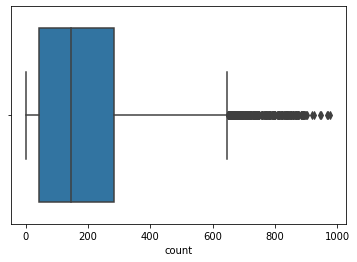

In [9]:
sns.boxplot(train['count'])

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

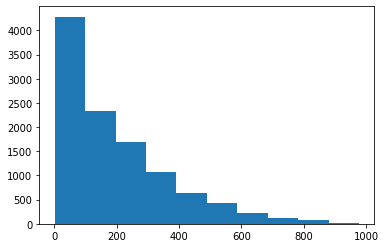

In [10]:
plt.hist(train['count'])

### **1-3 데이터 탐색해 보기 - 시각화**

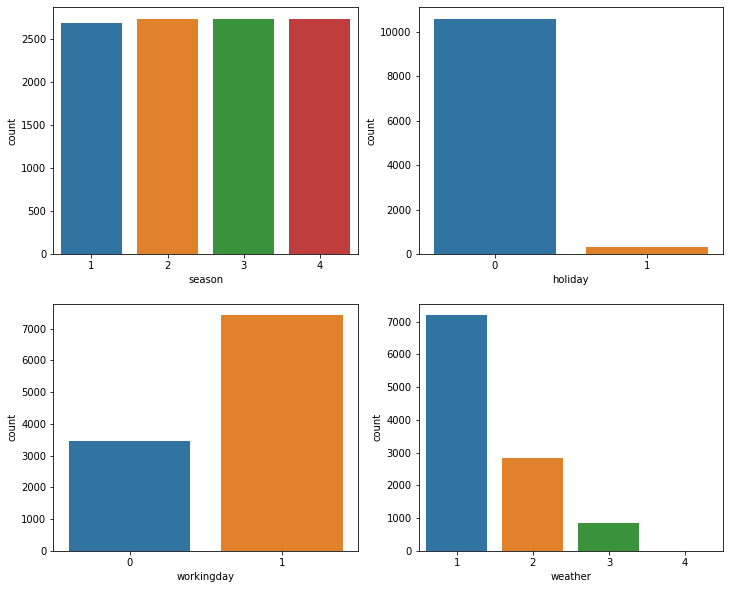

In [11]:
# 범주형 변수

col_names = [ 'season', 'holiday', 'workingday', 'weather' ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정

for name in col_names:            # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
  i = i + 1                       # 숫자를 1씩 증가.
  plt.subplot(2,2,i)              # 2행 2열에 i번째 그래프 선택
  sns.countplot(name, data=train) # i번째 그래프에 sns.countplot를 그리겠다.

plt.show()   # 주피터에서 보여주지만, 다른곳(editor, pycharm)에서는 이걸 실행시켜야 한다.

In [12]:
# 수치형 변수
# temp, atemp, humidity, windspeed
num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

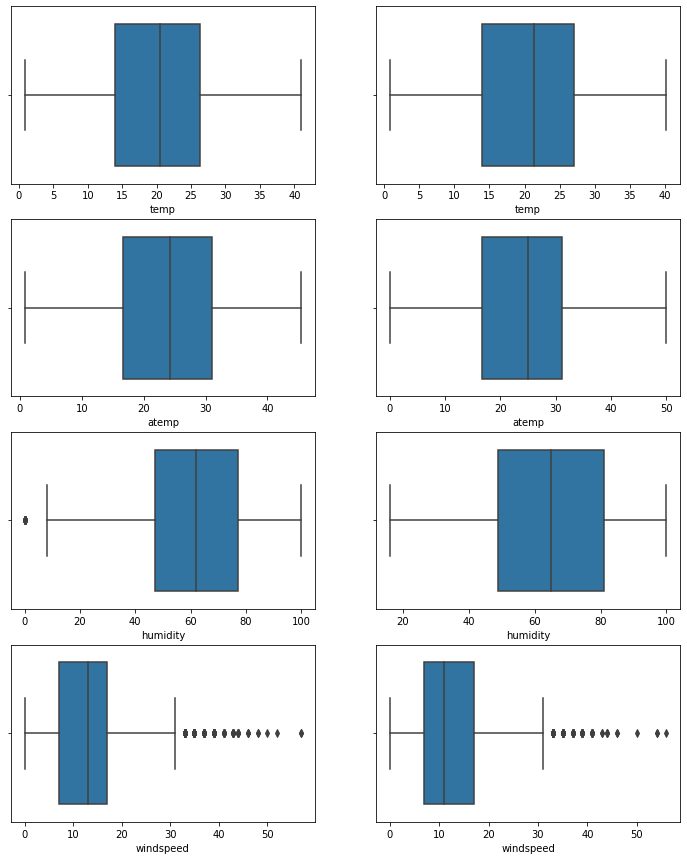

In [13]:
# par(mfrow=c(2,2)) -> R

i = 0
plt.figure(figsize=(12,15))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:          # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
  i = i + 1                     # 숫자를 1씩 증가.
  plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
  sns.boxplot(name, data=train) # i번째 그래프에 sns.countplot를 그리겠다.
  plt.subplot(4,2,i*2)          # 2행 2열에 i번째 그래프 선택
  sns.boxplot(name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.

plt.show()

In [0]:
# 데이터 백업
new_tr = train.copy()
new_test = test.copy()

### **1-4 파생변수(더미변수) 생성**

In [0]:
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek

In [0]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

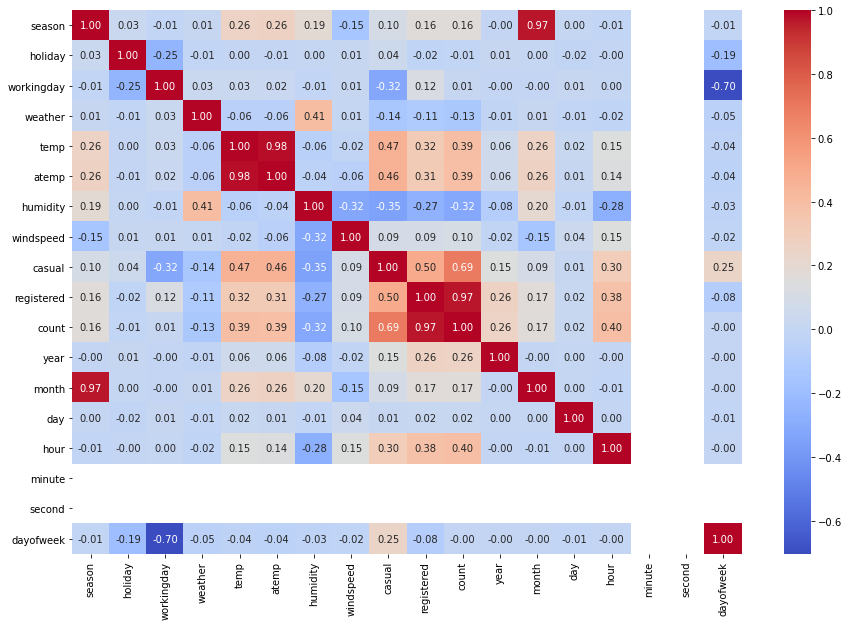

In [17]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [41]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 'temp',
                  'atemp', 'humidity', 'windspeed', "year", "hour", "dayofweek"]   # 공통 변수
X_train = new_tr[feature_names]   # 학습용 데이터 변수 선택
print(X_train.head())

   season  holiday  workingday  weather  ...  windspeed  year  hour  dayofweek
0       1        0           0        1  ...        0.0  2011     0          5
1       1        0           0        1  ...        0.0  2011     1          5
2       1        0           0        1  ...        0.0  2011     2          5
3       1        0           0        1  ...        0.0  2011     3          5
4       1        0           0        1  ...        0.0  2011     4          5

[5 rows x 11 columns]


In [42]:
label_name = 'count'               # 렌탈 대수 (종속변수)
y_train = new_tr[label_name]       # 렌탈 대수 변수 값 선택
X_test = new_test[feature_names]   # 테스트 데이터의 변수 선택
X_test.head()                      # 테스트 데이터 선택된 내용 보기

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


### **1-5 모델 만들기**

선형회귀

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()    # 모델 생성
model.fit(X_train, y_train)   # 학습
pred = model.predict(X_test)  # 예측

In [45]:
model.score(X_train, y_train)

0.3872754462588646

랜덤포레스트

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
model = RandomForestRegressor(n_jobs=-1, random_state=37)  # 모델 생성
model.fit(X_train, y_train)                                # 학습
pred = model.predict(X_test)                               # 예측

In [48]:
model.score(X_train, y_train)

0.9927558987252199

### **1-6 모델 평가 및 제출**

* 데이터 나누는 방법으로 기본으로 train_test_split 함수가 있음.
* 교차검증 반복 함수 : cross_val_score(model, X, y, scoring=None, cv=None)
  * model : 회귀 분석 모형
  * X : 독립 변수 데이터
  * y : 종속 변수 데이터
  * scoring : 성능 검증에 사용할 함수 이름
  * cv : 교차검증 생성기 객체 또는 숫자.
  * None이면 KFold(3), 숫자 k이면 KFold(k)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

In [0]:
import numpy as np

In [0]:
model_list = ['LinearRegression','DecisionTreeRegressor','KNeighborsRegressor',
              'RandomForestRegressor','AdaBoostRegressor','xgb']

In [0]:
model_score = []

**LinearRegression**


In [0]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
score = cross_val_score(model_linear, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# 5개의 검증 score 평균의 절대값
m_score = np.abs(score.mean())
model_score.append(m_score)

In [100]:
m_score   # 적을수록 좋음(MSE)

21086.863746046205

**DecisionTree**

In [0]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
score = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
m_score = np.abs(score.mean())
model_score.append(m_score)

In [102]:
m_score

7876.907318276091

**KNN**

In [0]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
score = cross_val_score(model_knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
m_score = np.abs(score.mean())
model_score.append(m_score)

In [104]:
m_score

20132.064093622575

**RandomForest**

In [0]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
score = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
m_score = np.abs(score.mean())
model_score.append(m_score)

In [106]:
m_score

5239.0141544157

**AdaBoost**

In [0]:
model_ab = AdaBoostRegressor()
model_ab.fit(X_train, y_train)
score = cross_val_score(model_ab, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
m_score = np.abs(score.mean())
model_score.append(m_score)

In [108]:
m_score

14660.435767095583

**XGBoost**

In [0]:
#data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [109]:
model_xg = xgb.XGBRegressor()
model_xg.fit(X_train, y_train)
score = cross_val_score(model_xg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
m_score = np.abs(score.mean())
model_score.append(m_score)

[05:56:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [110]:
m_score

7143.878641204009

In [112]:
dat = pd.DataFrame({'model_name':model_list, 'score':model_score})
dat

,model_name,score
0,LinearRegression,21086.863746
1,DecisionTreeRegressor,7876.907318
2,KNeighborsRegressor,20132.064094
3,RandomForestRegressor,5239.014154
4,AdaBoostRegressor,14660.435767
5,xgb,7143.878641


**최종 모델 선택 : score가 가장 좋은(낮은) RandomForest 모델 선택**

In [0]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
pred = model_RF.predict(X_test)

In [0]:
sub = pd.read_csv('sampleSubmission.csv')
sub['count'] = pred
sub.to_csv('submission_200609.csv', index=False)